Mounting drive so that files can be read and written in folder 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Change the path to the location where your files are located on the drive

In [2]:
%cd /content/gdrive/My Drive/Classroom/Big Data Analytics - Spring 2021/Assignment 1/

/content/gdrive/My Drive/Classroom/Big Data Analytics - Spring 2021/Assignment 1


Adding imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.metrics import mean_squared_error
import statistics
import matplotlib.pyplot as plt
from collections import Counter

Read the tab separated file into dataframe 

In [4]:
df=pd.read_csv('profiles.txt', delimiter='\t',header=None)

Add header containing column names to the dataframe

In [7]:
df.columns=['user_id','public','completion_percentage','gender', 'region','last_login','registration', 'age',
    'body','I_am_working_in_field','spoken_languages','hobbies','I_most_enjoy_good_food', 'pets',
    'body_type','my_eyesight','eye_color', 'hair_color',
    'hair_type',
    'completed_level_of_education',
    'favourite_color',
    'relation_to_smoking',
    'relation_to_alcohol',
    'sign_in_zodiac',
    'on_pokec_i_am_looking_for',
    'love_is_for_me',
    'relation_to_casual_sex',
    'my_partner_should_be',
    'marital_status',
    'children',
    'relation_to_children',
    'I_like_movies',
    'I_like_watching_movie',
    'I_like_music',
    'I_mostly_like_listening_to_music','the_idea_of_good_evening','I_like_specialties_from_kitchen',
    'fun','I_am_going_to_concerts',
    'my_active_sports','my_passive_sports',
    'profession','I_like_books','life_style','music',
    'cars','politics','relationships','art_culture',
    'hobbies_interests','science_technologies','computers_internet',
    'education','sport','movies','travelling','health','companies_brands','more','m2']

**Exploratory Data Analysis**

Checking count of nulls in each column

In [8]:
df.isnull().sum(axis=0)

user_id                                   0
public                                    0
completion_percentage                     0
gender                                  163
region                                  163
last_login                              163
registration                            163
age                                     163
body                                 838959
I_am_working_in_field               1051691
spoken_languages                     831112
hobbies                              828490
I_most_enjoy_good_food               936563
pets                                 932122
body_type                            886860
my_eyesight                          814891
eye_color                            732964
hair_color                           779961
hair_type                            861849
completed_level_of_education         886858
favourite_color                      804927
relation_to_smoking                  786859
relation_to_alcohol             

Checking count of nulls in each row

In [ ]:
df.isnull().sum(axis=1)

0          46
1          23
2          22
3          37
4          52
           ..
1632798    52
1632799    52
1632800    52
1632801    50
1632802    52
Length: 1632803, dtype: int64

Checking values in different columns

In [ ]:
df['my_active_sports'].head(100)

0                                                   NaN
1                                                   NaN
2                                   lyzovanie, plavanie
3               hokej, futbal, auto-moto sporty, squash
4                                                   NaN
                            ...                        
95                                                  NaN
96    nie som velky sportovec..dokonca ani plavat ne...
97                                                  NaN
98                                                  NaN
99                                                  NaN
Name: my_active_sports, Length: 100, dtype: object

In [ ]:
df['fun'].head(100)

0                                                   NaN
1     <div> <a title="vstup do klubu" href="/klub/pr...
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
95                                                  NaN
96    <div> <a title="vstup do klubu" href="/klub/st...
97                                                  NaN
98                                                  NaN
99    <div> <a title="vstup do klubu" href="/klub/gr...
Name: fun, Length: 100, dtype: object

In [ ]:
df['my_eyesight'].head(100)

0                                            NaN
1                                        vyborny
2     to co by som mal nosit tak nenosim asi tak
3                                            NaN
4                                            NaN
                         ...                    
95                                       vyborny
96                                           NaN
97                                           NaN
98                                           NaN
99                                           NaN
Name: my_eyesight, Length: 100, dtype: object

After exploring data it is found that columns:
*   fun 
*   life_style
*   music 
*   politics
*   cars
*   relationships
*   art_culture
*   hobbies_interest
*   science_technologies
*   computers_internet
*   education
*   sports
*   movies
*   travelling
*   health
*   companies_brands
*   more

have garbage data in them, so these columns are dropped. Apart from that we are also dropping columns:
*   registration
*   public
*   completion_percentage
*   body_type
*    body
*   my_eyesight
*   hair_type
*   sign_in_zodiac
*   on_pokec_i_am_looking_for

because they donot provide information relavant to our analysis.163 rows that contain null data in each column are also dropped.




In [ ]:
df_raw=df

Dropping rows having null in each column

In [ ]:
df=df[df.completion_percentage!=0]


Dropping columns having garbage values

In [ ]:
df.drop(['fun','life_style','music','cars','politics','relationships','art_culture',
        'hobbies_interests','science_technologies','computers_internet',
        'education','sport','movies','travelling','health','companies_brands','more','m2'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Dropping columns that are not of interest

In [ ]:
df.drop(['registration','public','body','body_type','my_eyesight',
        'hair_type','sign_in_zodiac','on_pokec_i_am_looking_for'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Calculating new completion_percentage according to existing columns

In [ ]:
# subtracting 1 from total number of columns because we will eventually drop completion_percentage column 
#and donot want it to be part of overall calculation
total_cols=len(df.columns)-1
print(total_cols)

33


In [ ]:
number_of_nonnull_in_rows=df.notnull().sum(axis=1)
  

In [ ]:
temp1=np.subtract(number_of_nonnull_in_rows,1)
temp2=np.divide(temp1,total_cols)
new_completion_percentage=np.multiply(temp2,100)

In [ ]:
print(new_completion_percentage)

0          30.303030
1          81.818182
2          93.939394
3          57.575758
4          15.151515
             ...    
1632798    15.151515
1632799    15.151515
1632800    15.151515
1632801    21.212121
1632802    15.151515
Length: 1632640, dtype: float64


In [ ]:
df['completion_percentage']=new_completion_percentage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['completion_percentage']=df['completion_percentage'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,user_id,completion_percentage,gender,region,last_login,age,I_am_working_in_field,spoken_languages,hobbies,I_most_enjoy_good_food,pets,eye_color,hair_color,completed_level_of_education,favourite_color,relation_to_smoking,relation_to_alcohol,love_is_for_me,relation_to_casual_sex,my_partner_should_be,marital_status,children,relation_to_children,I_like_movies,I_like_watching_movie,I_like_music,I_mostly_like_listening_to_music,the_idea_of_good_evening,I_like_specialties_from_kitchen,I_am_going_to_concerts,my_active_sports,my_passive_sports,profession,I_like_books
0,1,30,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,26.0,it,anglicky,"sportovanie, spanie, kino, jedlo, pocuvanie hu...",v dobrej restauracii,mam psa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,81,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,0.0,NaN,nemecky,"turistika, prace okolo domu, praca s pc, pocuv...",pri svieckach s partnerom,macka,zelene,cierne,"zakladne, ale som uz na strednej skole dufam z...","cierna, modra, ruzova",nefajcim,"pijem prilezitostne, iba ked sa nieco kona a t...","nie je nic lepsie, ako byt zamilovany(a)",iba s mojou laskou,laskou mojho zivota,slobodny(a),no budu a tak chcem 2 deti staci a tak ked bud...,v buducnosti chcem mat deti,"komedie, romanticke",doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,93,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,23.0,najvatcsej firme na svete urad prace,no predsa svoj :d a najlepsie druhy,"cestovanie, pocuvanie hudby, nenudit sa",v dobrej restauracii,ja a nas prefikany alik :),hnede,hnede hnede,coskoro 24.5 alebo 31.9 :d,"biela, modra, zelena",nemam,pijem iba ked musim ...svadby.pohreby.krstiny ...,oplati sa pre nu bojovat,ja uz som stary na take veci :),ked ho stretnem tak vam o nom porozpravam :),slobodny(a),casom ak budem este vladat :d,NaN,take co ma uputaju,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,57,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,29.0,"reklamy a medii, sluzieb a obchodu","anglicky, nemecky","sportovanie, cestovanie",NaN,NaN,zelene,hnede,NaN,"cierna, modra",NaN,NaN,NaN,NaN,NaN,slobodny(a),NaN,NaN,"akcne, horory, komedie, sci-fi, dokumentarne, ...",NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
4,4,15,0.0,"banskobystricky kraj, brezno",2011-12-29 12:25:00.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632798,1632799,15,0.0,"banskobystricky kraj, revuca",2012-05-12 16:46:00.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632799,1632800,15,1.0,"trenciansky kraj, myjava",2012-02-09 02:43:00.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632800,1632801,15,1.0,"kosicky kraj, kosice - okolie",2012-05-26 12:10:00.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632801,1632802,21,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-16 11:32:00.0,19.0,NaN,NaN,miluju slovaky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,miluju slovaky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Counter(df['completion_percentage'])

Counter({15: 579757,
         18: 24135,
         21: 18674,
         24: 16830,
         27: 17417,
         30: 18740,
         33: 22174,
         36: 20447,
         39: 20609,
         42: 25131,
         45: 18639,
         48: 20027,
         51: 21761,
         54: 22916,
         57: 24284,
         60: 27099,
         63: 25935,
         66: 28675,
         69: 32358,
         72: 37840,
         75: 40695,
         78: 48131,
         81: 57118,
         84: 59528,
         87: 68011,
         90: 74939,
         93: 76909,
         96: 78815,
         100: 105046})

(array([622566.,  52987.,  63230.,  63797.,  68961.,  53034.,  98873.,
        145944., 202478., 260770.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <a list of 10 Patch objects>)

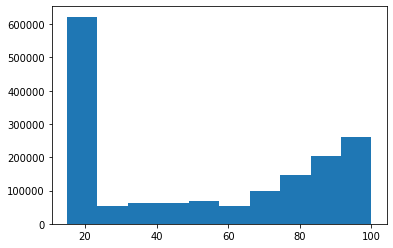

In [ ]:
plt.hist(df['completion_percentage'])

Dropping rows having completion_percentage less than 60

In [ ]:
df=df[df.completion_percentage>=60]


In [ ]:
len(df)

761099

In [ ]:
df

,user_id,completion_percentage,gender,region,last_login,age,I_am_working_in_field,spoken_languages,hobbies,I_most_enjoy_good_food,pets,eye_color,hair_color,completed_level_of_education,favourite_color,relation_to_smoking,relation_to_alcohol,love_is_for_me,relation_to_casual_sex,my_partner_should_be,marital_status,children,relation_to_children,I_like_movies,I_like_watching_movie,I_like_music,I_mostly_like_listening_to_music,the_idea_of_good_evening,I_like_specialties_from_kitchen,I_am_going_to_concerts,my_active_sports,my_passive_sports,profession,I_like_books
1,2,81,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,0.0,NaN,nemecky,"turistika, prace okolo domu, praca s pc, pocuv...",pri svieckach s partnerom,macka,zelene,cierne,"zakladne, ale som uz na strednej skole dufam z...","cierna, modra, ruzova",nefajcim,"pijem prilezitostne, iba ked sa nieco kona a t...","nie je nic lepsie, ako byt zamilovany(a)",iba s mojou laskou,laskou mojho zivota,slobodny(a),no budu a tak chcem 2 deti staci a tak ked bud...,v buducnosti chcem mat deti,"komedie, romanticke",doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,93,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,23.0,najvatcsej firme na svete urad prace,no predsa svoj :d a najlepsie druhy,"cestovanie, pocuvanie hudby, nenudit sa",v dobrej restauracii,ja a nas prefikany alik :),hnede,hnede hnede,coskoro 24.5 alebo 31.9 :d,"biela, modra, zelena",nemam,pijem iba ked musim ...svadby.pohreby.krstiny ...,oplati sa pre nu bojovat,ja uz som stary na take veci :),ked ho stretnem tak vam o nom porozpravam :),slobodny(a),casom ak budem este vladat :d,NaN,take co ma uputaju,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
5,17,60,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,27.0,NaN,"anglicky, nemecky","citanie, pocuvanie hudby, pozeranie filmov, sp...",NaN,pes,zelene,"blond, odfarbene",vysokoskolske,"biela, cierna, modra, fialova",nefajcim,pijem prilezitostne,"nie je nic lepsie, ako byt zamilovany(a), hlad...",nedokazem mat s niekym sex bez lasky,NaN,vydata za najuzasnejsieho cloveka pod slnkom,NaN,v buducnosti chcem mat deti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
6,5,90,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,26.0,som nezamestnany,"anglicky, nemecky, pascal","sportovanie, prace v zahrade, pc hry, pocuvani...",v dobrej restauracii,"nemam ziadne, nemam rad zvierata zo vseobecnos...","zelene, a trocha hnedej k tomu","hnede, kedysi som ol blondak ale uz sa za to n...","bakalarske, ale este ne som nadumany:)","hneda, modra, zelena",nefajcim,pozitivny,"v laske som sa sklamal(a), preto som velmi opa...",NaN,"mojou chybajucou polovickou, vydrzat moj spev",slobodny(a),NaN,NaN,"horory, komedie, romanticke, serialy, zahadne,...",v kine,"rock, sladaky, alternativa, povedal by som str...",ked ide o kvalitnu hudbu je jedno kde a kedy,"ist do kina alebo divadla, ist na koncert, s k...","slovenskej, talianskej",hlavne vytancit a vyspievat,"posilnovanie, informatik a posilka..jak som sa...",ja vacsinou na telku nemam cas a na pozeranie ...,skola mi bohate staci,je level kniha???
8,31,84,1.0,"zilinsky kraj, kysucke nove mesto",2012-02-18 13:20:00.0,24.0,NaN,"nemecky, slovensky,cesky,ale najlepsie svoj","sportovanie, turistika, prace okolo domu, prac...",NaN,"pes, tinku",hnedozelena,ako kedy,stredoskolske,"biela, cierna, modra",rad by som prestal,sem tam si taky dam,"krasny cit,len skoda ze je jej tak malo a vacs...",vela robia okolnosti,partnerka by mala byt niekym na koho nemozem p...,"slobodny,aj bezdetny dufam hehe",NaN,"mam velmi rad deti,ale myslim ze na vlastne ma...",ktore ma dokazu pobavit alebo zaujat,NaN,"hudba ma musi zauj

Finally dropping completion_percentage column

In [ ]:
df.drop(['completion_percentage'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking data for outliers

Inspecting 'age' column

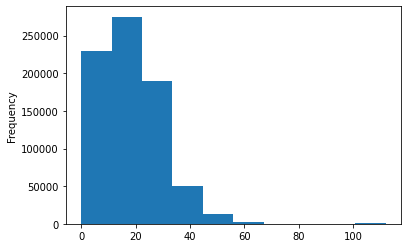

In [ ]:
df['age'].plot.hist()

Removing users with age>=100 and replace users with age=0 with median age

In [ ]:
df=df[df.age<100]

In [ ]:
med=statistics.median(df['age'])
df['age'].mask(df['age'] == 0, med, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


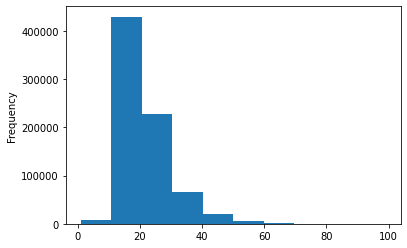

In [ ]:
df['age'].plot.hist()

Converting datatype of last_login column from object to datetime

In [ ]:
df['last_login']=pd.to_datetime(df['last_login'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.to_csv("clean_data.csv",index=False)

In [ ]:
#ss=pd.read_csv("clean_data.csv")

In [ ]:
#ss

In [ ]:
plt.

SyntaxError: ignored